Interactive plot

In [1]:
import torch

from src.dataloader import DataLoader
from src.model import r0, epidemic_model

In [2]:
data = DataLoader()
r0gen = r0.R0Generator(data)
model = epidemic_model.EpidemicModel(data)

susc = torch.ones(data.n_age).to(data.device)
data.model_params.update({"susc": susc})

In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [4]:
def create_interactive_plot():
    t_eval = torch.linspace(1, 1200, 1200).to(data.device)
    susceptibles = model.get_initial_values()[model.idx("s_0")]

    def update(r0, alpha):
        beta = r0 / r0gen.get_eig_val(contact_mtx=data.cm,
                                      susceptibles=susceptibles.reshape(1, -1),
                                      population=data.age_data.flatten())
        data.model_params["beta"] = beta
        data.model_params["alpha"] = alpha
        model.initialize_constant_matrices()

        sol = model.get_solution(y0=model.get_initial_values()[None, :], t_eval=t_eval[None, :]).ys[0, :, :]
        mask = torch.cat((torch.full((100,), True),
                          sol[100:, model.idx('i_0')].sum(axis=1) > 1))
        sol = sol[mask, :]
        t = t_eval[mask]
        for idx, comp in enumerate(["ic", "d"]):
            comp_sol = model.aggregate_by_age(sol, comp)
            plt.plot(t, comp_sol, label=comp.upper(), linewidth=2)
        plt.legend()
        plt.xlabel = "Napok"
        plt.ylabel = "Egyedszám"
        plt.show()
    r0_slider = widgets.FloatSlider(value=2,
                               min=1 ,
                               max=10,
                               step=0.1,
                               description="R0:")
    alpha_slider = widgets.FloatSlider(value=0.5,
                                     min=0.05,
                                     max=1,
                                     step=0.05,
                                     description="Alpha: ")
    # Hozzáadás az ábrához
    widgets.interact(update, r0=r0_slider, alpha=alpha_slider)

In [ ]:
create_interactive_plot()

Sensitivity analysis

In [23]:
from src.simulation.simulation_vacc import SimulationVaccinated
from src.simulation.simulation_contact import SimulationContact

In [24]:
def run_vacc_sim():
    simulation = SimulationVaccinated()
    simulation.run_sampling()
    simulation.calculate_prcc()
    simulation.calculate_p_values()
    simulation.plot_prcc()
    simulation.plot_optimal_vaccine_distributions()

In [25]:
def run_contact_sim():
    sim = SimulationContact()
    sim.run_sampling()
    sim.calculate_prcc()
    sim.calculate_p_values()
    sim.plot_prcc_and_p_values()

Batches completed:   0%|          | 0/1 [00:00<?, ?it/s]


 Simulation for 1000 samples (1.0-1.8-i_max)
Batch size: 1000



Batches completed: 100%|██████████| 1/1 [00:17<00:00, 17.42s/it]



 Average speed = 57.366 iterations/second 



Batches completed:   0%|          | 0/1 [00:00<?, ?it/s]


 Simulation for 1000 samples (1.0-1.8-ic_max)
Batch size: 1000



Batches completed: 100%|██████████| 1/1 [00:15<00:00, 15.51s/it]



 Average speed = 64.456 iterations/second 



Batches completed:   0%|          | 0/1 [00:00<?, ?it/s]


 Simulation for 1000 samples (1.0-1.8-d_max)
Batch size: 1000



Batches completed: 100%|██████████| 1/1 [00:15<00:00, 15.76s/it]



 Average speed = 63.463 iterations/second 


Insignificant p-values in  1.0-1.8-ic_max  case: 

	 1. p-val:  0.24676206603643047
	 14. p-val:  0.4354526747726579

Insignificant p-values in  1.0-1.8-d_max  case: 

	 2. p-val:  0.06571473794034755
	 4. p-val:  0.34524326879823075


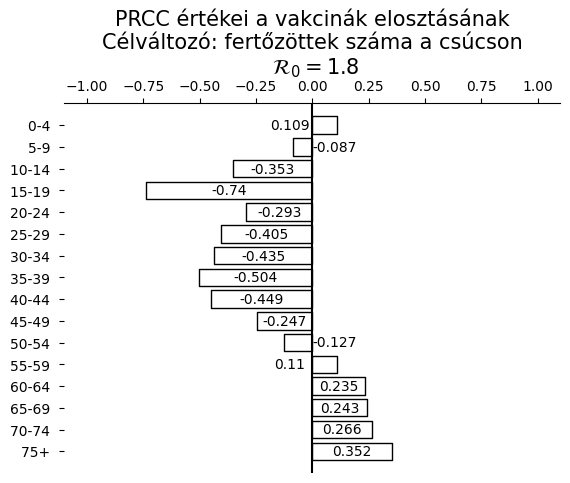

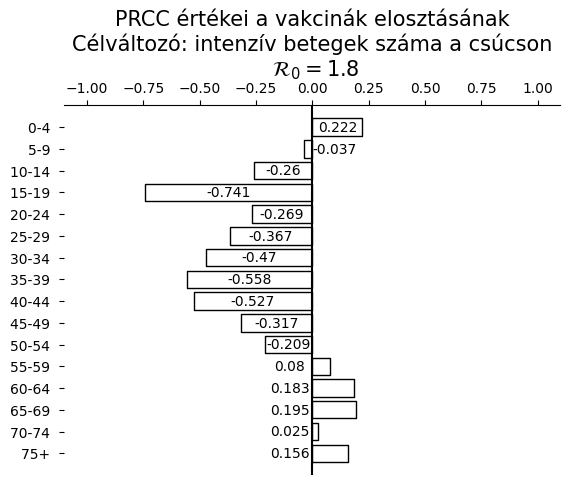

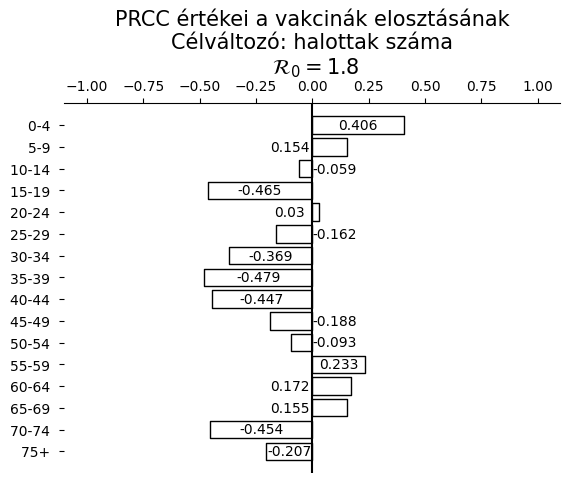

FileNotFoundError: [Errno 2] No such file or directory: '../sens_data_vacc/optimal_vaccination/optimal_vaccination_1.0-1.8-i_max.csv'

In [26]:
run_vacc_sim()